# K - Means Algorithm

## What is Clustering?


<kbd>CLUSTERING TASK</kbd> Group/Cluster similar data points.

<kbd>OBSERVATIONS</kbd> 
    Points in a cluster are close together.
    Points in different cluster are far away from each other.
    

Clustering is UNSUPERVISED LEARNING.

Algorithm(for clustering): K-means, K-means++, Hierarchical Clustering, DBSCAN
    
<img src="img/2.png">

## Applications of Clustering
    
* E-commerce - Task is to group similar customers based on there purchasing behavior. Customer behaviour can include: 
    - How much money they spent
    - Kind of credit card
    - Kind of products they buy
    - Geographical area
    
<img src="img/3.jpg">

* Image Segmentation - grouping of similar pixels
    - After grouping, we typically apply ML techniques to perform object detection.
    
<img src="img/4.jpg">
    

<b>K-MEANS CLUSTERING</b>
    - Group them into 'k' clusters.
    - For every clusters, it assigns centroid to each cluster.
   
<img src="img/1.png">

<img src="img/7.png">

<img src="img/8.png">

<img src="img/6.png">
    

## Coding Sample

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [4]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [5]:
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Text(0.5, 1.0, 'K Mean Clustering')

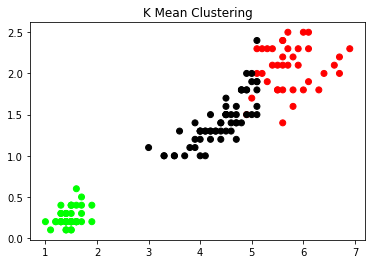

In [6]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_])
plt.title('K Mean Clustering')

## Since we have the original class lables, lets check how accurate the KMeans is doing.

In [7]:
predict = model.predict(X)

In [9]:
Y = iris.target

In [10]:
from scipy.stats import mode
labels = np.zeros_like(predict)
for i in range(3):
    mask = (predict==i)
    labels[mask] = mode(Y[mask])[0]

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y, labels)

0.8933333333333333

In [12]:
confusion_matrix(Y, labels)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

## Hierarchical Clustering

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

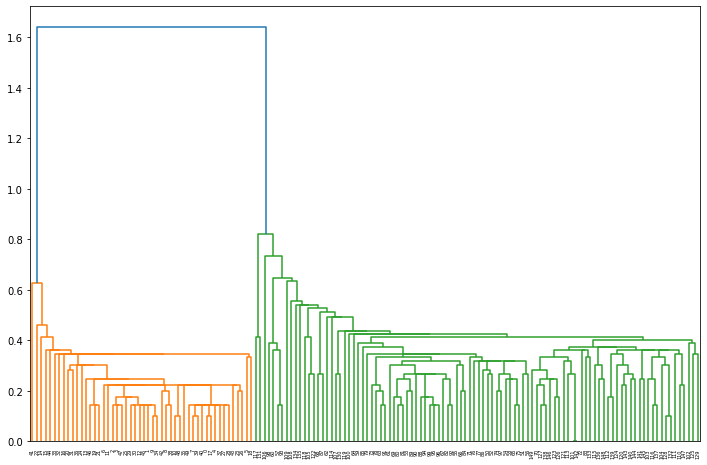

In [20]:
# Different ways to compute distance between two clusters
# Single Linkage

plt.figure(figsize=(12, 8))
mergings = linkage(X, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

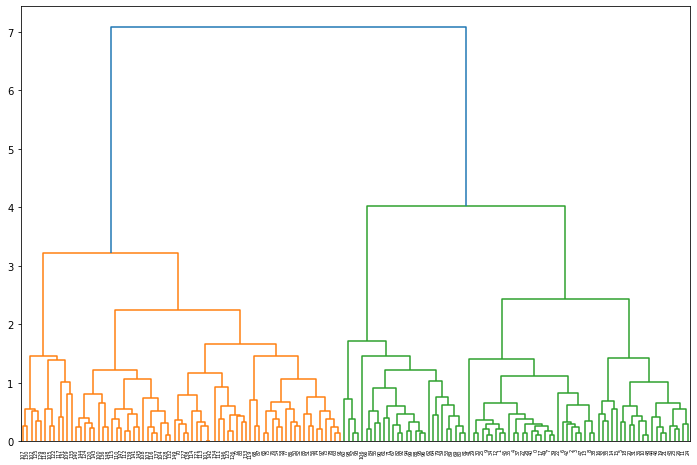

In [21]:
# Complete Linkage

plt.figure(figsize=(12, 8))
mergings = linkage(X, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [22]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
    

In [23]:
# 3 clusters

lables = cut_tree(mergings, n_clusters=3).reshape(-1, )

lables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Agglomerative Clustering')

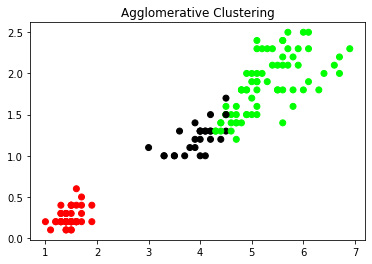

In [24]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[lables])
plt.title('Agglomerative Clustering')